# "MNE tutorial part 1"

- toc: true 
- badges: true
- comments: true
- author: MNE Python workshop
- categories: [jupyter, EEG, MNE]

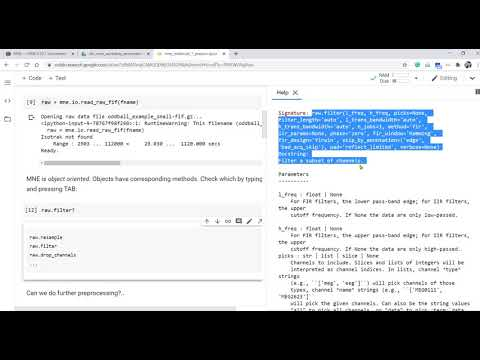

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('qb9ngu62Fbw', width=800, height=400)

In [2]:
%matplotlib notebook
import mne
import matplotlib.pyplot as plt

In [3]:
fname = "oddball_example_small-fif.gz"

# Read in raw data; raw objects

In [4]:
raw = mne.io.read_raw_fif(fname)

Opening raw data file oddball_example_small-fif.gz...


<ipython-input-4-78767f98f250>:1: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(fname)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.


MNE is *object oriented*. Objects have corresponding methods. Check which by typing `raw.` and pressing TAB:

In [5]:
raw.filter

<bound method BaseRaw.filter of <Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~119 kB, data not loaded>>

    raw.resample
    raw.filter
    raw.drop_channels
    ...

Can we do further preprocessing?..

In [6]:
raw.filter(1, 20)

RuntimeError: By default, MNE does not load data into main memory to conserve resources. inst.filter requires raw data to be loaded. Use preload=True (or string) in the constructor or raw.load_data().

Aha! By default, MNE does not store raw and epochs objects in memory.

In [7]:
raw = mne.io.read_raw_fif(fname, preload=True)

Opening raw data file oddball_example_small-fif.gz...
Isotrak not found


<ipython-input-7-7341ee706cdd>:1: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(fname, preload=True)


    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


In [16]:
raw.filter(1, 20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 sec)



<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.4 MB, data loaded>

In [41]:
plt.rcParams["figure.figsize"]=20,10

Inspecting raw data ...

In [33]:
%matplotlib inline

In [43]:
%qtconsole

In [51]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [52]:
raw.plot();

<IPython.core.display.Javascript object>

There are many eog artefacts. We will use ICA to correct these. For this, we create an ICA object
and use its `.fit` method on a filtered copy of the raw data:

In [12]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [13]:
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 sec)

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 4.4s.


<ICA  |  raw data decomposition, fit (fastica): 109098 samples, 20 components, channels used: "eeg">

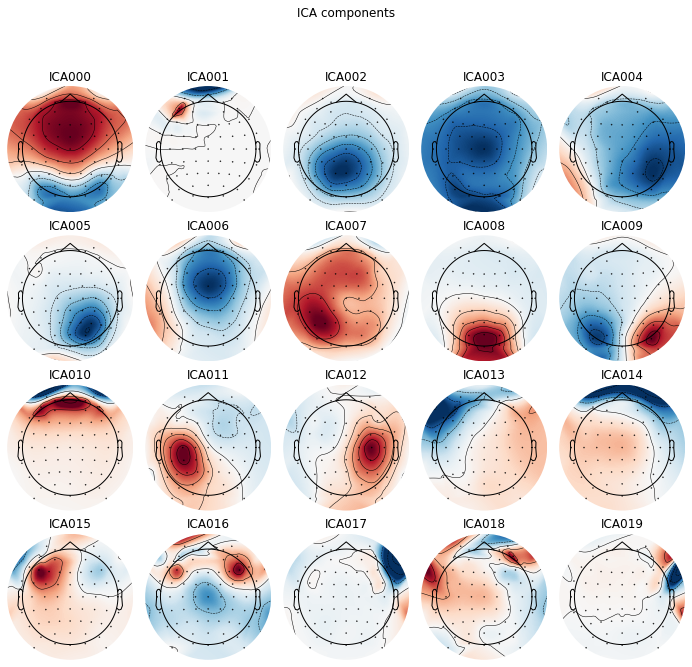

In [14]:
ica.plot_components(outlines="skirt");

We store "bad" components in the ica object.

In [ ]:
ica.exclude = [1, 10, 14, 17, 18, 19]

We could also use one of the automatic algorithms ...

In [ ]:
bad_idx, scores = ica.find_bads_eog(raw, 'SO2', threshold=2)
print(bad_idx)

Using channel SO2 as EOG channel
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1024 samples (10.240 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 

Let's compare raw and corrected data ...

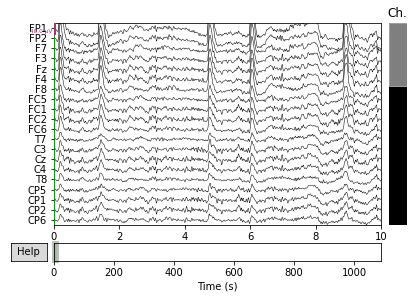

In [ ]:
raw.plot();

Transforming to ICA space (20 components)
Zeroing out 6 ICA components


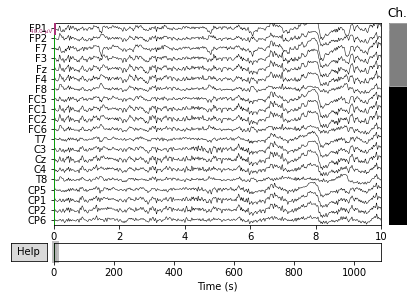

In [ ]:
ica.apply(raw.copy(), exclude=ica.exclude).plot();

In [ ]:
plt.rcParams["figure.figsize"]=20,10

## Epochs

For epoching the data, we need event markers. Usually, these are stored in the `raw` object;
in MNE, in a stimulus channel.

In [ ]:
mne.find_events?

In [ ]:
events = mne.find_events(raw)

903 events found
Event IDs: [100 200]


`events` is simply an array (time in samples, zero, trigger);

In [ ]:
events

array([[  3241,      0,    200],
       [  3437,      0,    200],
       [  3643,      0,    200],
       ...,
       [111496,      0,    200],
       [111613,      0,    200],
       [111719,      0,    200]])

... which we can visualize:

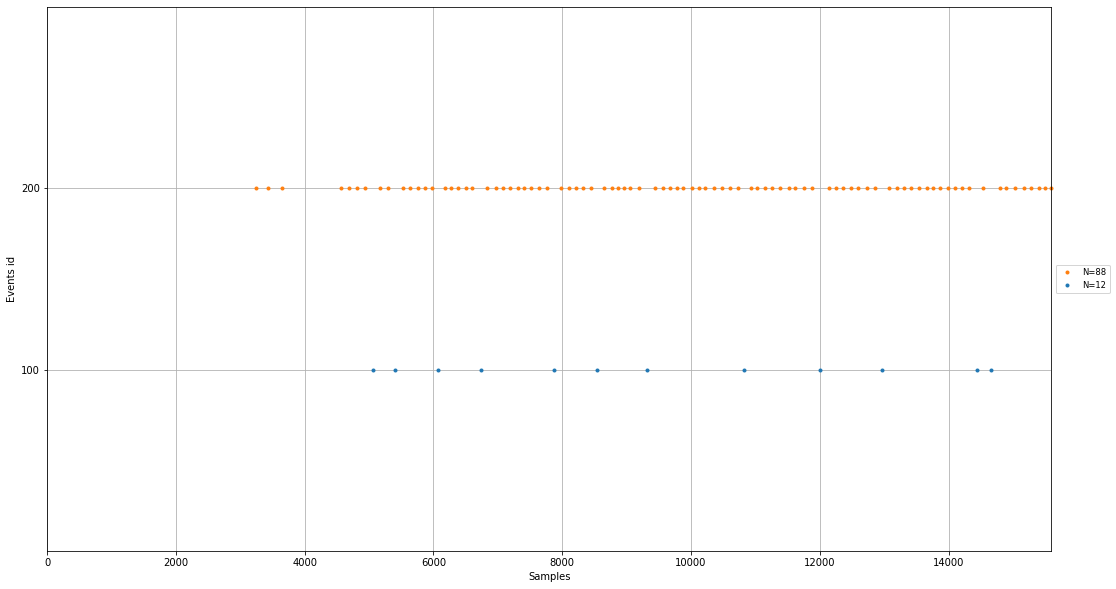

In [ ]:
mne.viz.plot_events(events[:100]);

For creating an `mne.Epochs` object, we require, in addition to the `raw` object and the `events` array, a dictionary of the intended condition names and the corresponding trigger numbers.

In [ ]:
event_ids = {"standard/stimulus": 200, "target/stimulus": 100}

epochs = mne.Epochs(raw, events, event_id=event_ids)

903 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


Loading data for 903 events and 71 original time points ...
0 bad epochs dropped
Loading data for 903 events and 71 original time points ...
Loading data for 20 events and 71 original time points ...


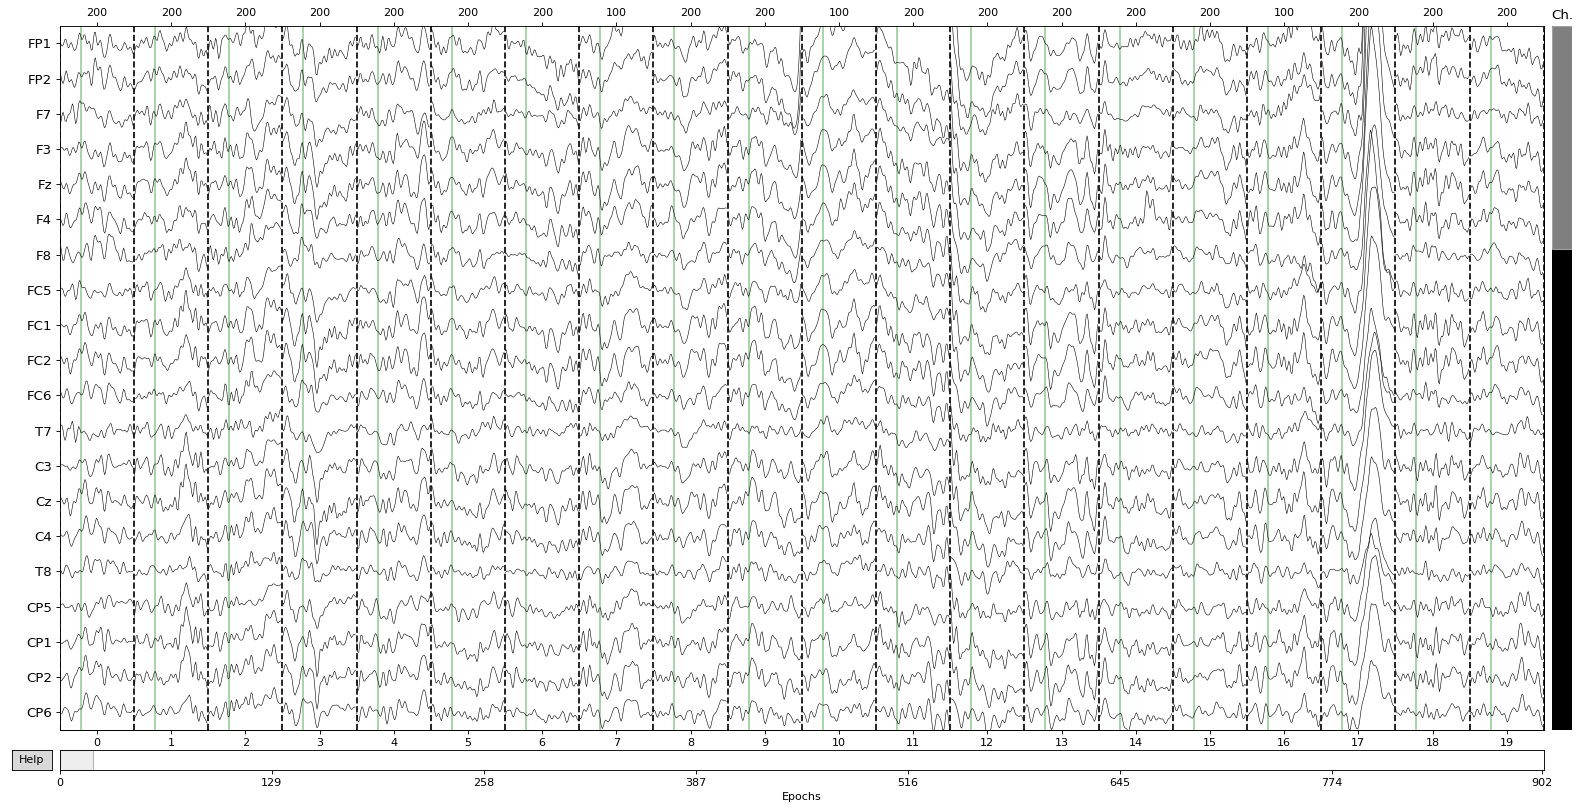

In [ ]:
epochs.plot();

(changing to the inline backend now to speed things up.)

In [57]:
epochs = ica.apply(epochs, exclude=ica.exclude)

Transforming to ICA space (20 components)
Zeroing out 6 ICA components


Of course ...

In [56]:
epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True)
epochs = ica.apply(epochs, exclude=ica.exclude)

903 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 903 events and 71 original time points ...
0 bad epochs dropped
Transforming to ICA space (20 components)
Zeroing out 6 ICA components


The `mne.Epochs` constructor has a number of options, such as time window lengths and rejection thresholds.
Investigate them on your own.

`Epochs` objects also have various methods, different from `raw` objects - e.g., for baselining.

In [58]:
epochs.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


<Epochs  |   903 events (all good), -0.2 - 0.5 sec, baseline [None, 0], ~31.4 MB, data loaded,
 'standard/stimulus': 797
 'target/stimulus': 106>

... and many more ...

In [59]:
epochs.

SyntaxError: ignored

To subselect only a sample of epochs, a dict-like access mode is available.

In [61]:
epochs

<Epochs  |   903 events (all good), -0.2 - 0.5 sec, baseline [None, 0], ~31.4 MB, data loaded,
 'standard/stimulus': 797
 'target/stimulus': 106>

In [62]:
epochs["target"]

<Epochs  |   106 events (all good), -0.2 - 0.5 sec, baseline [None, 0], ~3.8 MB, data loaded,
 'target/stimulus': 106>

Observe how tags selected by forward slashes - "/" - work.

In [65]:
epochs["stimulus"]

<Epochs  |   903 events (all good), -0.2 - 0.5 sec, baseline [None, 0], ~31.4 MB, data loaded,
 'standard/stimulus': 797
 'target/stimulus': 106>

How does the epoched activity look like?

In [67]:
epochs.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 STIM
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>

106 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


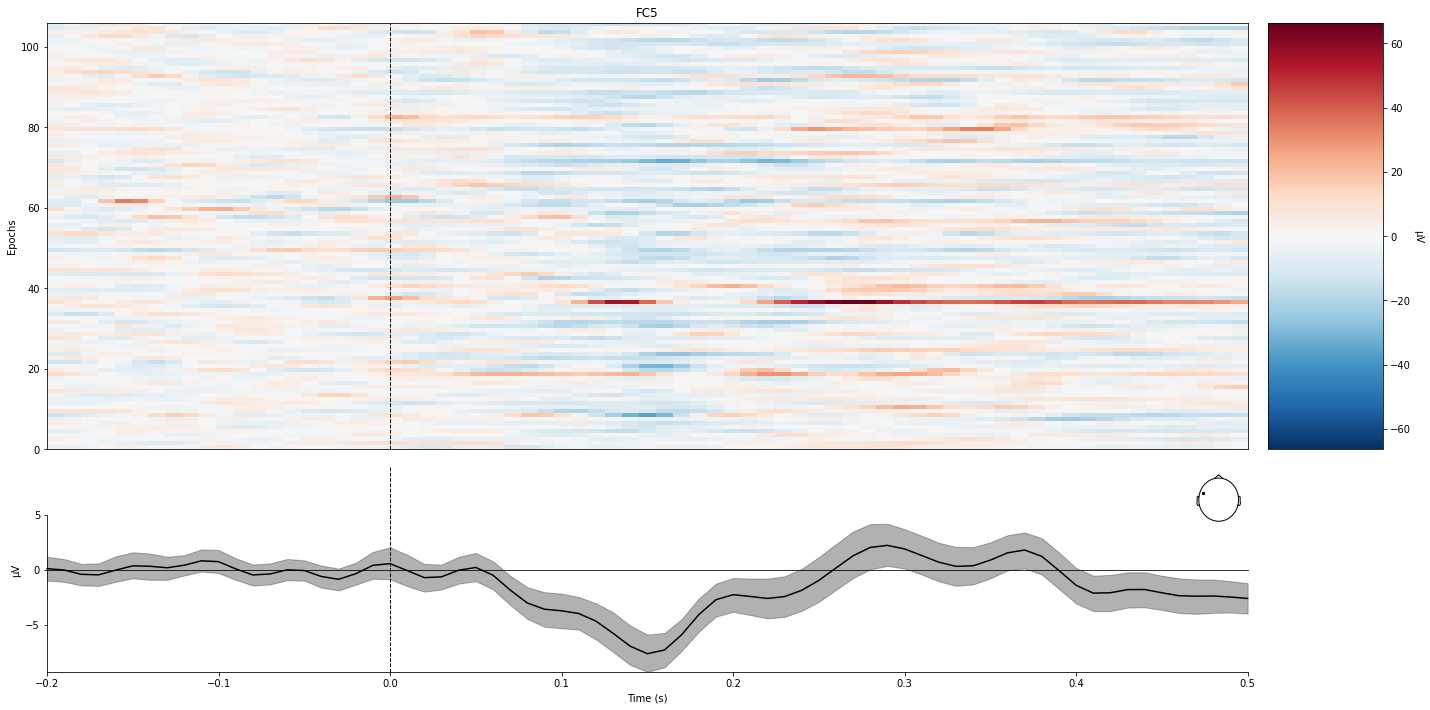

In [70]:
epochs["target"].plot_image(picks=[7]);

To ensure we have as many Oddball as Standard trials, we can run ...

In [71]:
epochs.equalize_event_counts(event_ids)
epochs

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

<Epochs  |   212 events (all good), -0.2 - 0.5 sec, baseline [None, 0], ~7.5 MB, data loaded,
 'standard/stimulus': 106
 'target/stimulus': 106>

We can write the Epochs object to disk so we don't have to repeat the
preprocessing later ...

In [74]:
epochs.save("oddball2-epo.fif")  # remember, the data has been cleaned of bad ICs

In [75]:
ls

mne_notebook_1_preproc.ipynb      oddball2-epo.fif              README.md
mne_notebook_2_evoked_data.ipynb  oddball-epo.fif
mne_notebook_3_mvpa.ipynb         oddball_example_small-fif.gz


In [76]:
epochs_for_tfr = mne.Epochs(raw, events, event_id=event_ids,
                            tmin=-.5, tmax=1.5, preload=True)  # need longer data segment                      

903 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 903 events and 201 original time points ...
0 bad epochs dropped


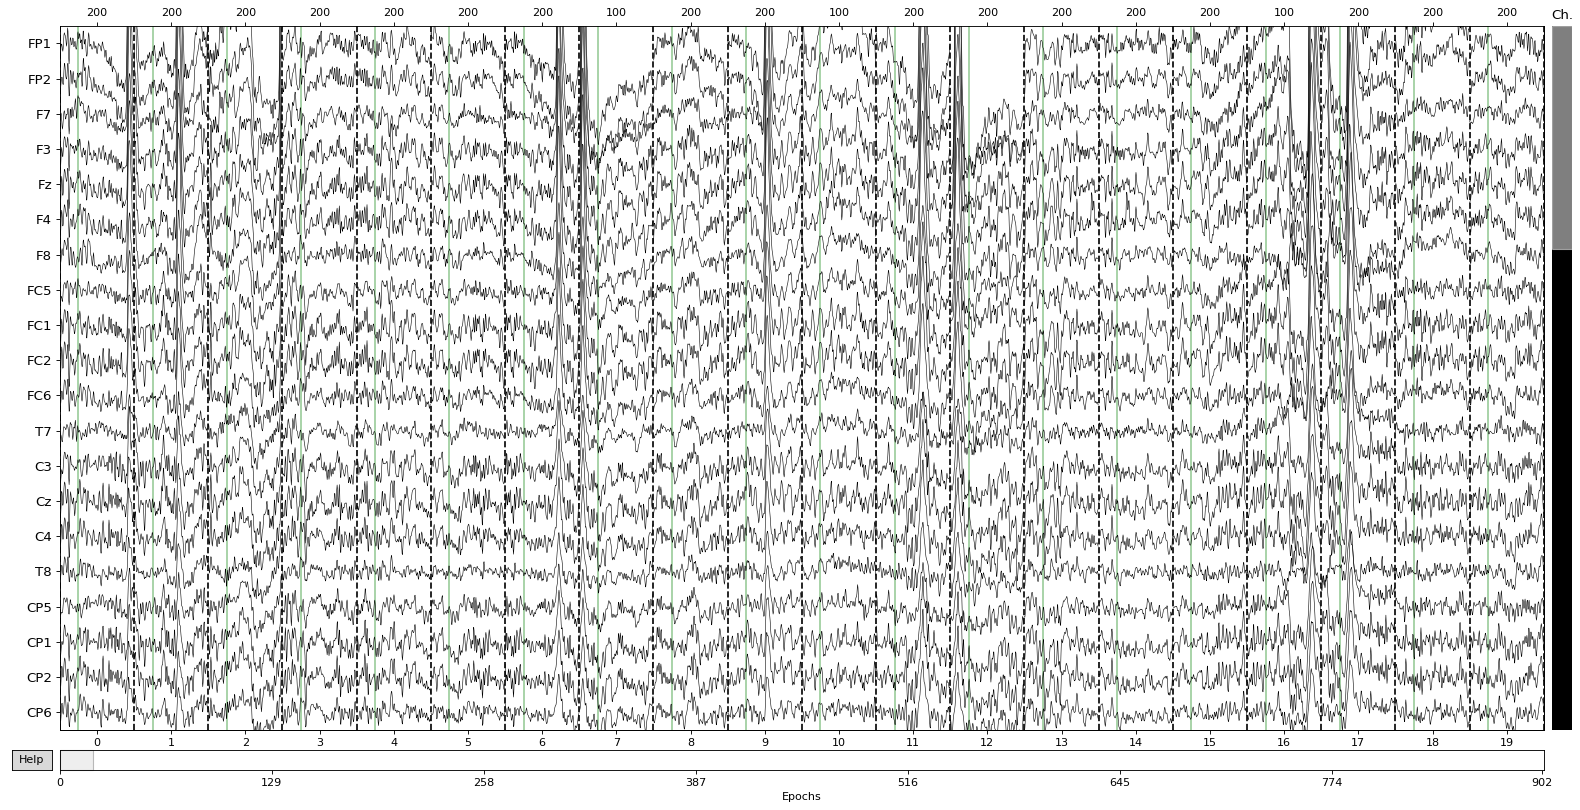

In [77]:
epochs_for_tfr.plot();

In [78]:
epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)
epochs_for_tfr.equalize_event_counts(event_ids);  # to speed up things

epochs_for_tfr.save("oddball-long-epo.fif")

Transforming to ICA space (20 components)
Zeroing out 6 ICA components
Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262

In [79]:
ls

mne_notebook_1_preproc.ipynb      oddball-epo.fif
mne_notebook_2_evoked_data.ipynb  oddball_example_small-fif.gz
mne_notebook_3_mvpa.ipynb         oddball-long-epo.fif
oddball2-epo.fif                  README.md


In [80]:
X = epochs.get_data()

In [81]:
X.shape

(212, 64, 71)

In [82]:
type(X)

numpy.ndarray

In [83]:
epochs['target'].get_data().shape

(106, 64, 71)